In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, RepeatedKFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import catboost as ct
import xgboost as xgb

from sklearn.metrics import roc_auc_score

plt.figure(figsize=(40, 10))

<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

In [92]:
df_train = pd.read_excel('data/Data_Train.xlsx')
df_test = pd.read_excel('data/Test_set.xlsx')

In [93]:
size_train_df = df_train.shape[0]
y_train = df_train['Price'].values
df = pd.concat((df_train, df_test)).reset_index(drop=True)
df.drop(['Route', 'Price'], axis=1, inplace=True)

In [86]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,4,No info
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,1,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,1,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,0,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,0,No info
...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,0,No info
13350,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,2h 35m,4,No info
13351,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,0,No info
13352,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,15h 15m,0,No info


IndexError: index 0 is out of bounds for axis 0 with size 0

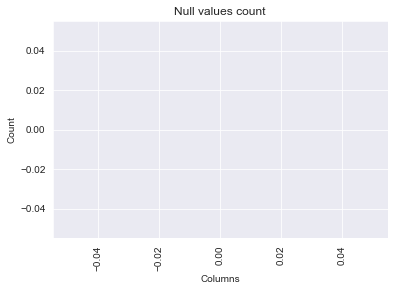

In [98]:
null_count = df.isna().sum().sort_values(ascending=False)

plt.title('Null values count')
plt.xlabel('Columns')
plt.ylabel('Count')
null_count[null_count > 0].plot(kind='bar');

In [96]:
# Заменяем значения null на чаще всего встречающееся
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [97]:
# Убираю дубликаты
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1 stop,No info
13350,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,2h 35m,non-stop,No info
13351,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1 stop,No info
13352,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
# Удаляю выбросы


In [85]:
label_e = LabelEncoder()
df['Total_Stops'] = label_e.fit_transform(df['Total_Stops'])

In [91]:
df['Total_Stops'].value_counts()

0    7056
4    4340
1    1899
2      56
3       2
5       1
Name: Total_Stops, dtype: int64

In [95]:
df['Total_Stops'].mode()[0]

'1 stop'